In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


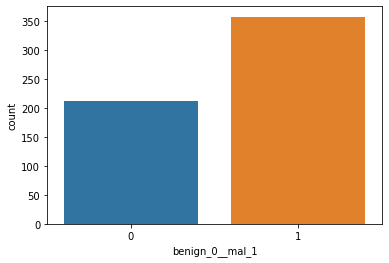

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

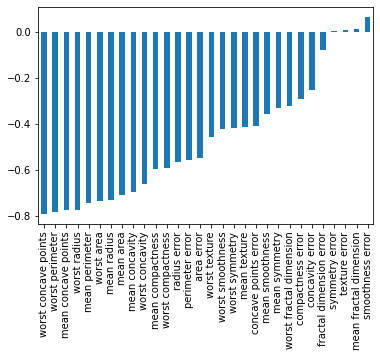

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

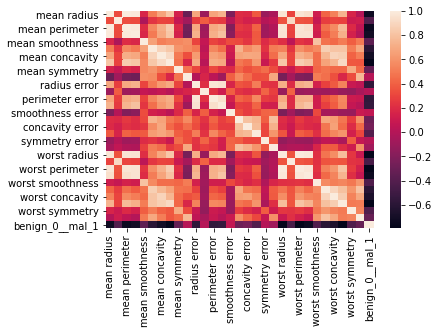

In [8]:
sns.heatmap(df.corr())

Separation des données test et train

In [9]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values  

In [10]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
X_train.shape

(426, 30)

In [31]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

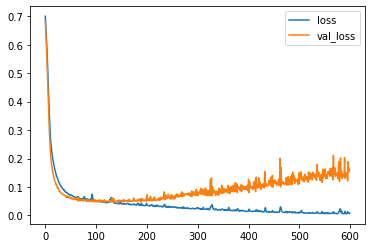

In [34]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [35]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),callbacks=[early_stop])

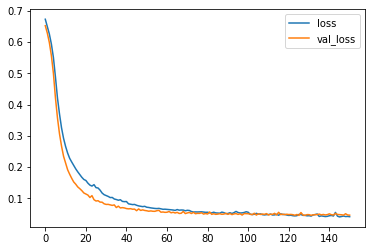

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [41]:
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5))#va desactiver avec 0.5 % de chance un nneuronne 
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7274 - val_loss: 0.6922
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7034 - val_loss: 0.6817
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6930 - val_loss: 0.6716
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6723 - val_loss: 0.6608
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6632 - val_loss: 0.6461
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6497 - val_loss: 0.6285
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6383 - val_loss: 0.6049
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6166 - val_loss: 0.5791
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6052 - val_loss: 0.5475
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5799 - val_loss: 0.5144
Epoch 11

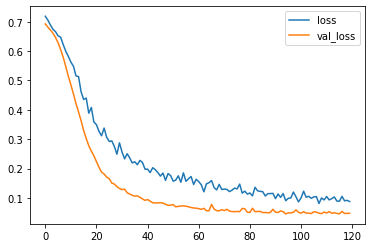

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [45]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



on voit que le model a mal classifié 2 cas, un ou il  a dit " tu n'est pas malade " alors que si, et 1 autre ou il a dit tu es malade, alors que non

In [48]:
print(confusion_matrix(y_test, predictions))

[[53  1]
 [ 1 88]]
